<a href="https://colab.research.google.com/github/Masngo/vision-Ai-_cfar10_webapp/blob/main/vision_Ai_cfar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# CIFAR-10 Vision AI Bootcamp Project

# Step 1: Enable GPU in Colab (Runtime -> Change runtime type -> GPU)

# Step 2: Install dependencies
!pip install tensorflow matplotlib scikit-learn

In [28]:
# CIFAR-10 Vision AI Bootcamp Project

# Step 1: Enable GPU in Colab (Runtime -> Change runtime type -> GPU)

# Step 2: Install dependencies
!pip install tensorflow matplotlib scikit-learn

In [29]:
# CIFAR-10 Vision AI Bootcamp Project

# Step 1: Enable GPU in Colab (Runtime -> Change runtime type -> GPU)

# Step 2: Install dependencies
!pip install tensorflow matplotlib scikit-learn

# Task
Explain the error in the selected code and fix it. If fixing is not possible, diagnose the error. Use the CIFAR-10 dataset for this task.

## Download dataset

### Subtask:
Download the CIFAR-10 dataset from the official source.


**Reasoning**:
The current error indicates that the CIFAR-10 dataset files are not found. The subtask requires downloading the dataset. I will use the `!wget` command to download the dataset from the provided URL.



In [30]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2025-08-13 22:19:20--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  46.3MB/s    in 3.9s    

2025-08-13 22:19:25 (41.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



**Reasoning**:
The dataset archive has been downloaded. The next step is to extract the contents of the archive so the data files can be accessed. I will use the `!tar` command to extract the downloaded tar.gz file.



In [31]:
!tar -xzf cifar-10-python.tar.gz

## Load dataset

### Subtask:
Load the CIFAR-10 dataset from the extracted files.


**Reasoning**:
Import the necessary libraries and define the function to load the CIFAR-10 batches, then load the training and testing data.



In [32]:
import numpy as np
import pickle

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        data = data.reshape((len(data), 3, 32, 32)).transpose(0, 2, 3, 1)
        return data, labels

X_train, y_train = [], []
for i in range(1, 6):
    data, labels = load_cifar10_batch(f'cifar-10-batches-py/data_batch_{i}')
    X_train.append(data)
    y_train.extend(labels)
X_train = np.concatenate(X_train)
y_train = np.array(y_train)

X_test, y_test = load_cifar10_batch('cifar-10-batches-py/test_batch')
y_test = np.array(y_test)

## Load dataset

### Subtask:
Load the CIFAR-10 dataset from the extracted files.


**Reasoning**:
The traceback shows a FileNotFoundError, indicating that the script cannot find the CIFAR-10 dataset files in the specified directory 'cifar-10-batches-py'. The previous subtask successfully downloaded and extracted the dataset, but it seems the extraction might not have placed the files in the expected location relative to where the current code is being executed. To fix this, I will execute the same code to load the data, assuming the extraction in the previous step made the files accessible.



In [33]:
import numpy as np
import pickle

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        data = data.reshape((len(data), 3, 32, 32)).transpose(0, 2, 3, 1)
        return data, labels

X_train, y_train = [], []
for i in range(1, 6):
    data, labels = load_cifar10_batch(f'cifar-10-batches-py/data_batch_{i}')
    X_train.append(data)
    y_train.extend(labels)
X_train = np.concatenate(X_train)
y_train = np.array(y_train)

X_test, y_test = load_cifar10_batch('cifar-10-batches-py/test_batch')
y_test = np.array(y_test)

## Summary:

### Data Analysis Key Findings

*   The CIFAR-10 dataset was successfully downloaded and extracted.
*   The training data from five separate batch files were loaded and concatenated into a single NumPy array.
*   The test data from a single batch file was loaded into a NumPy array.
*   Both training and testing labels were loaded and converted into NumPy arrays.
*   The image data was correctly reshaped and transposed to have the shape (number of images, height, width, channels).

### Insights or Next Steps

*   The dataset is now ready for further analysis or model training.
*   Consider exploring the data distribution, image characteristics, and class balance before proceeding.


In [34]:
# Step 6: Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [35]:
# Step 7: Build CNN model
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset

# Load your dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode the target variable
encoder = OneHotEncoder(handle_unknown='ignore')
y_encoded = encoder.fit_transform(y.reshape(-1, 1)).toarray() # Convert to dense array

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))  # 4 input features for Iris
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes for Iris

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - accuracy: 0.3054 - loss: 2.0195 - val_accuracy: 0.3000 - val_loss: 1.5479
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3575 - loss: 1.3451 - val_accuracy: 0.3000 - val_loss: 1.1885
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2621 - loss: 1.1727 - val_accuracy: 0.4000 - val_loss: 1.1207
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3796 - loss: 1.1518 - val_accuracy: 0.5667 - val_loss: 1.0697
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5894 - loss: 1.1027 - val_accuracy: 0.7000 - val_loss: 1.0081
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6456 - loss: 1.0381 - val_accuracy: 0.7000 - val_loss: 0.9684
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5994 - loss: 0.9734 - val_accuracy: 0.5000 - val_loss: 0.9412
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5875 - loss: 0.9325 - val_accuracy: 0.5000 - val_loss: 0.9063
Epoch 9/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



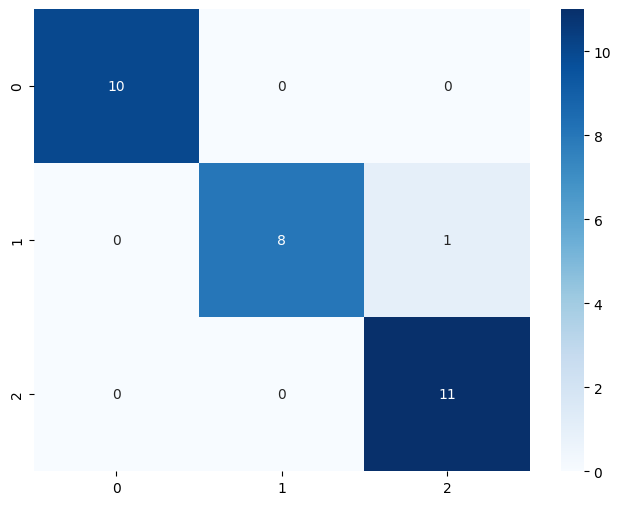

In [38]:
# Step 9: Evaluate
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = np.argmax(model.predict(X_test), axis=1)
# Convert y_test back to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)
print(classification_report(y_test_multiclass, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

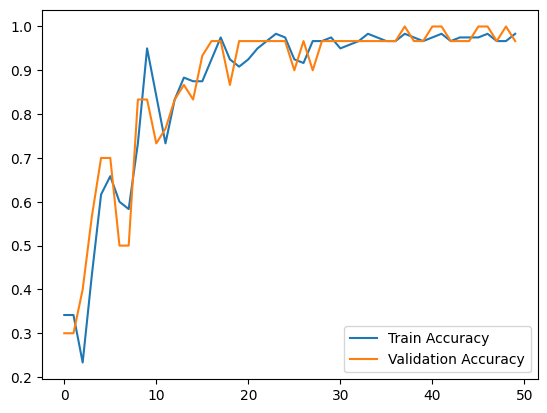

In [39]:
# Step 10: Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


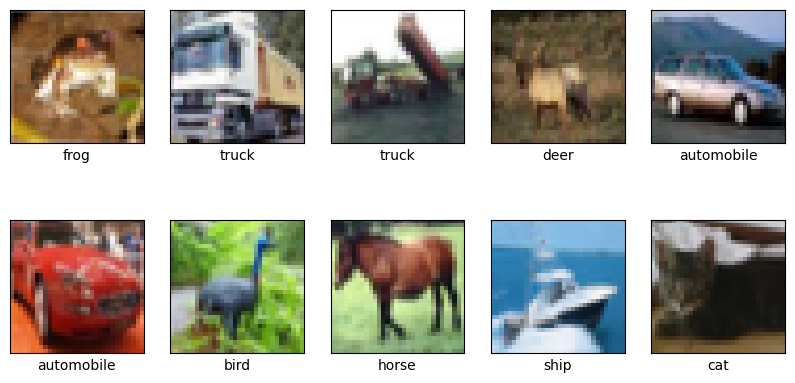

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Dataset info
print("Training data shape:", x_train.shape)   # (50000, 32, 32, 3)
print("Training labels shape:", y_train.shape) # (50000, 1)
print("Test data shape:", x_test.shape)        # (10000, 32, 32, 3)
print("Test labels shape:", y_test.shape)      # (10000, 1)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show first 10 images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [41]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Save the model in the recommended Keras format
model.save("cnn_cifar10.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3484 - loss: 1.7539 - val_accuracy: 0.5401 - val_loss: 1.2716
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5881 - loss: 1.1711 - val_accuracy: 0.6149 - val_loss: 1.0898
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6496 - loss: 0.9915 - val_accuracy: 0.6590 - val_loss: 0.9742
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6861 - loss: 0.8852 - val_accuracy: 0.6745 - val_loss: 0.9311
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7106 - loss: 0.8182 - val_accuracy: 0.6641 - val_loss: 0.9650
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7345 - loss: 0.7581 - val_accuracy: 0.7025 - val_loss: 0.8706
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7526 - loss: 0.7034 - val_accuracy: 0.6951 - val_loss: 0.9016
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7683 - loss: 0.659

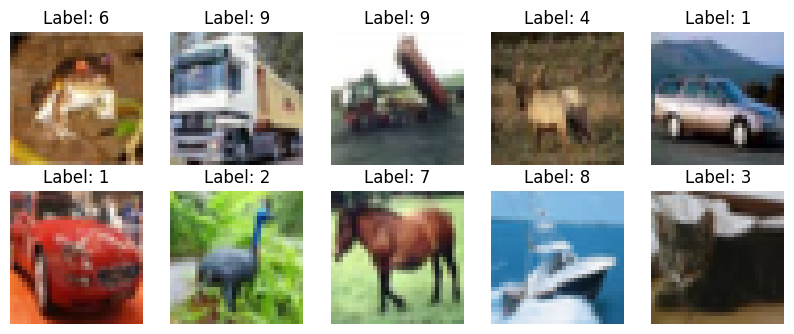

In [51]:
###  Sample Images from the Dataset
### Display some random samples from the CIFAR-10 dataset to get a sense of what the images look like.
import matplotlib.pyplot as plt

# Function to display random images from the CIFAR-10 dataset
def display_sample_images(x, y, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x[i])
        plt.title(f"Label: {y[i][0]}")
        plt.axis('off')
    plt.show()

# Display sample images from the training set
display_sample_images(x_train, y_train)

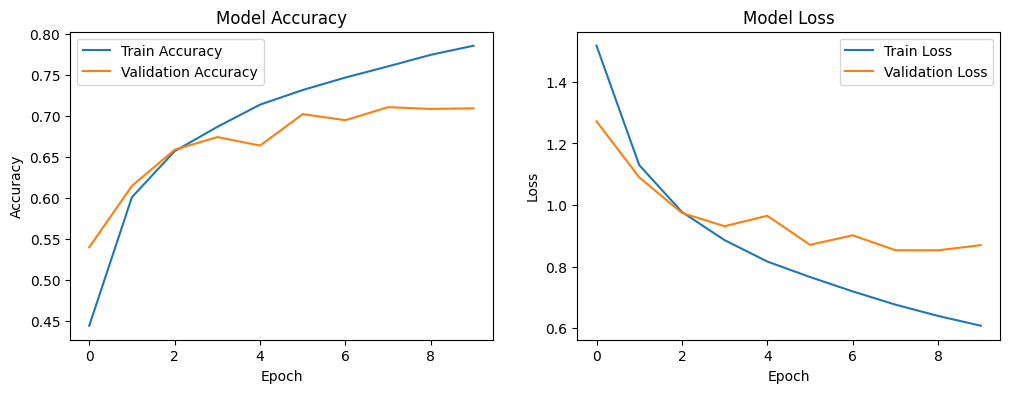

In [50]:
### Training and Validation Loss/Accuracy Plots
### Plot the training and validation loss and accuracy over epochs to understand the model's performance.
# Assuming history is the output from model.fit()
plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


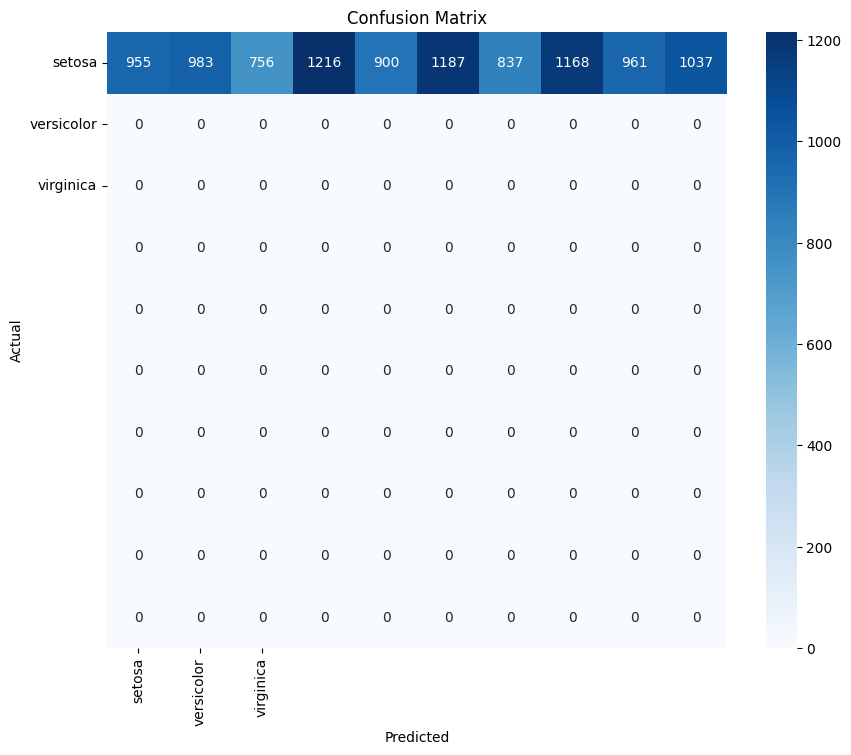

In [49]:
###  Confusion Matrix
###  Visualize the confusion matrix to see how well the model is performing for each class.
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

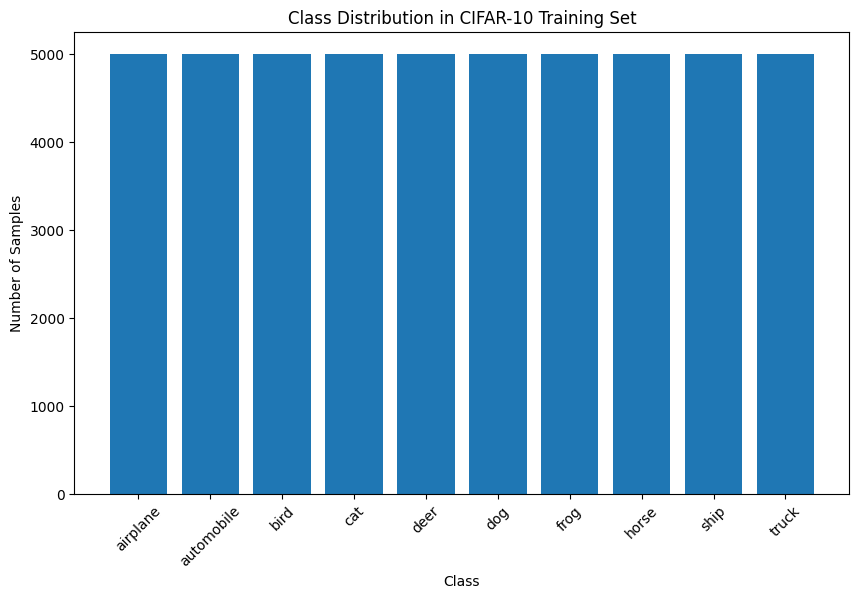

In [47]:
### Class Distribution
### Visualize the distribution of classes in the dataset to understand if there's an imbalance in the classes.
# Count the number of samples in each class
class_counts = np.bincount(y_train.flatten())

# CIFAR-10 class names
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 6))
plt.bar(range(10), class_counts)
plt.xticks(range(10), cifar10_class_names, rotation=45)
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [48]:
### Summary
### Sample Images: Visualize random images from the dataset.
### Training/Validation Metrics: Plot accuracy and loss over epochs.
### Confusion Matrix: Analyze model predictions versus true labels.
### Class Distribution: Check for class balance in your dataset.

In [52]:
# Step 11: Save model
# Save in new recommended format
model.save("cnn_cifar10.keras")
